# Interpolación a tramos

Dado un conjunto de puntos $\{x_i,y_i\}_{i=0,\ldots,n}$, se desea hallar una función $p:\mathbb{R}\to \mathbb{R}$ tal que $p(x_i)=y_i$ para todo $i$.

En clases anteriores vimos que elegir como función interpolante $p(x)$ un polinomio de grado $n$ podía introducir oscilaciones no deseadas (fenómeno de Runge), debido al grado del polinomio necesario.

Surge entonces la necesidad de realizar *interpolación a tramos*, es decir, utilizar una única función interpolante $p$, pero definida de manera diferente en cada intervalo $[x_{i-1},x_i]$ con $i=1,\ldots,n$.

A continuación discutimos cómo puede hacerse esto, utilizando el paquete `Interpolations` de Julia.

## Interpolación lineal

En la interpolación lineal, la función interpolante $p$ es una recta en cada subintervalo. Es decir, dados $x_0<x_1<\ldots<x_n$ tomamos:

$$p_i(x) = y_{i} + [y_{i-1},y_i](x-x_i) = y_i + \frac{y_i-y_{i-1}}{x_i-x_{i-1}}(x-x_i), \quad x\in [x_{i-1},x_i].$$


### Ejemplo

Consideremos el siguiente ejemplo usando la función de Runge

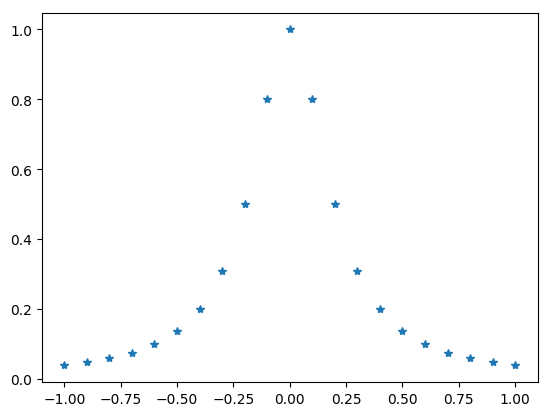

In [1]:
using PyPlot

x=collect(-1:.1:1);
y=1./(1+25*x.^2)

plot(x,y,"*");

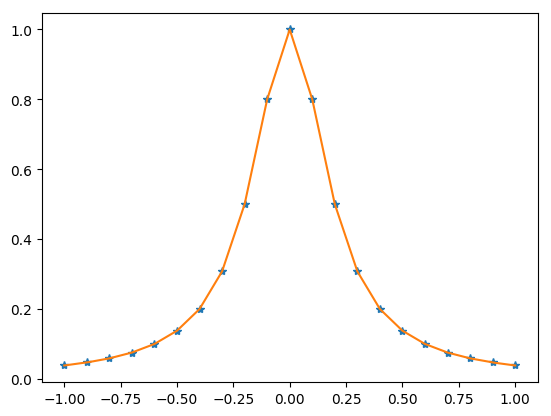

In [2]:
#Interpolacion lineal. Para cada punto xx se busca el intervalo al que pertenece y se evalúa la recta adecuada. xx debe estar en el rango del vector x, el cual debe estar ordenado.

function interpolacionLineal(xx;abs=x,ord=y)
    
    i=1;
    while(xx>=x[i] && i<length(x))
        i=i+1;
    end
    #al salir del while, xx esta entre x[i-1] y x[i]
    yy = y[i] + (y[i]-y[i-1])/(x[i]-x[i-1]) * (xx-x[i]);
    
end

xx=collect(-1:.01:1);
yy=interpolacionLineal.(xx;abs=x,ord=y)

plot(x,y,"*")
plot(xx,yy);


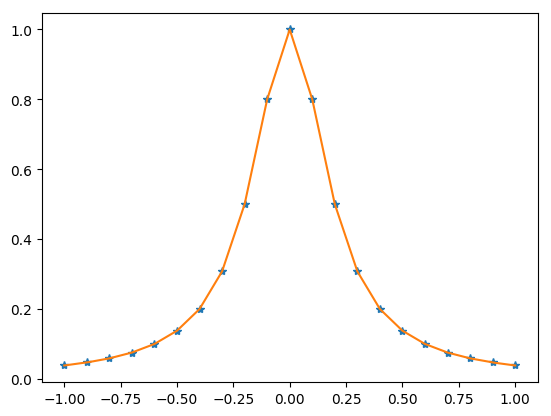

In [3]:
using Interpolations

itp = interpolate((x,),y, Gridded(Linear()))

xx=collect(-1:.01:1);

plot(x,y,"*")
plot(xx,itp[xx]);


## Splines cúbicos

El problema de la interpolación lineal a tramos es que presenta derivadas discontinuas en los nodos. Para solucionar este problema se utilizan los *Splines Cúbicos*.

La idea aquí es utilizar un polinomio de 3er. grado en cada intervalo:

$$p_i(x) = a_i + b_i(x-x_i) + c_i(x-x_i)^2 + d_i(x-x_i)^3 \quad x\in[x_{i-1},x_i], i=1,\ldots,n.$$

Observemos que hay $n$ polinomios con $4$ coeficientes, por lo que en total tenemos $4n$ incógnitas.

Se tiene un polinomio por cada intervalo, y para que interpole los puntos se deben cumplir las siguientes ecuaciones:

$$p_i(x_{i-1}) = y_{i-1} \quad i=1,\ldots,n.$$

$$p_i(x_{i}) = y_{i} \quad i=1,\ldots,n.$$

Para que la interpolación sea suave, le pedimos a la derivada primera y segunda que sean continuas en los nodos intermedios:

$$p'_{i-1}(x_i) = p'_i(x_i) \quad i=1,\ldots,n-1.$$

$$p''_{i-1}(x_i) = p''_i(x_i) \quad i=1,\ldots,n-1.$$

En total tenemos $4n-2$ ecuaciones, por lo que aún tenemos dos grados de libertad.

### Condiciones de borde:

Las dos ecuaciones restantes salen de imponer condiciones de borde a los polinomios $i=1$ e $i=n$. En particular se utilizan:

> **Frontera libre o Spline natural:**
>
> Se impone que la derivada segunda sea $0$ en los extremos. De este modo, el interpolante termina acoplándose a una recta en los bordes.
>
> $$p''_1(x_0) = 0, \quad p''_n(x_n) = 0.$$

> **Frontera sujeta:**
>
> Se impone un valor para la derivada en el borde:
>
> $$p'_1(x_1) = k_1, \quad p'_n(x_n) = k_n.$$

Con estas ecuaciones se resuelve el sistema y se calcula cada polinomio interpolante.

### Ejemplo

Realicemos la interpolación por Splines cúbicos de la función de Runge por los mismos puntos que antes, utilizando la condición de borde natural.

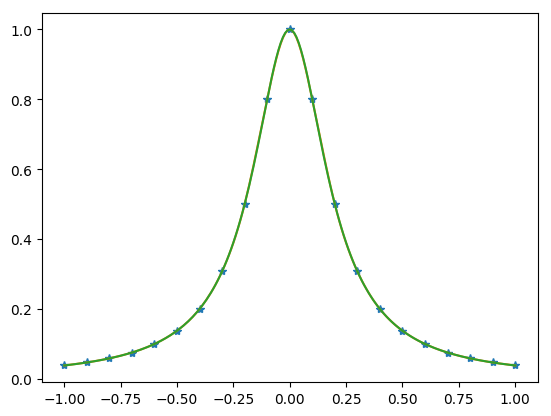

In [4]:

itp2 = interpolate(y,BSpline(Cubic(Natural())),OnGrid());
#el objeto itp2 interpola como si los nodos fueran 1 a n, hay que hacer una transformación lineal para llevarlo a nuestra grilla.
yy = itp2[10*(xx+1)+1]

plot(x,y,"*")
plot(xx,yy); 
plot(xx,1./(1+25*xx.^2));